In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
path_to_csv = "/content/drive/MyDrive/UIT - Semester 6/Data Analysis in Business/Dataset"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv(path_to_csv + '/TSLA.csv', index_col=0, parse_dates=True)

In [5]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [6]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [7]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data["Close"])

In [8]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'absolute_error'}
model = ensemble.GradientBoostingRegressor(**params)
model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='absolute_error',
                          max_depth=4, n_estimators=500)

In [9]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [10]:
y_pred = model.predict(x_test)

y_pred_val = model.predict(x_val)

In [11]:
y_pred

array([253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33201741,
       253.33201741, 253.33201741, 253.33201741, 253.33

In [12]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[253.33201741 253.33201741 253.33201741 253.33201741 253.33201741
 253.33201741 253.33201741 253.33201741 253.33201741 253.33201741
 253.33201741 253.33201741 253.33201741 253.33201741 253.33201741
 253.33201741 253.33201741 253.33201741 253.33201741 253.33201741
 253.33201741 253.33201741 253.33201741 253.33201741 253.33201741
 253.33201741 253.33201741 253.33201741 253.33201741 253.33201741]


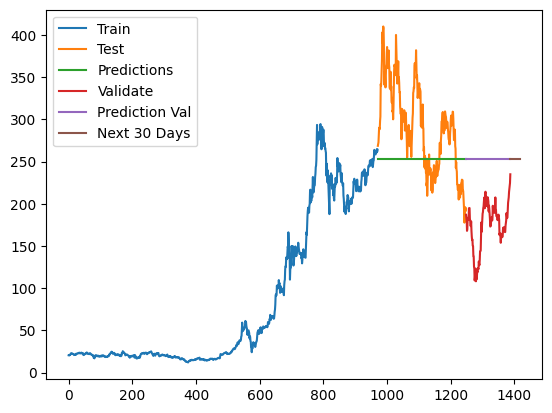

In [13]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate', "Prediction Val", "Next 30 Days"])
plt.show()